In [6]:
import os

# read text file into string
current_dir = os.getcwd()
file_path = f"{current_dir}/checkpoints/lisc/fixmatch_lisc_supervised_ratio_0.25_conf_thresh_0.8_fold_1_seed_1_0.25/fold1/log.txt"
with open(file_path, "r") as f:
    logs = f.read()

logs

'Epoch 0, iter 1, Dice Sup Loss: 0.94706, Dice Unsup Loss: 0.99813, BCE Sup Loss: 0.73019, BCE UnSup Loss: 0.74056\nEpoch 0, iter 2, Dice Sup Loss: 0.93935, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.55595, BCE UnSup Loss: 0.56603\nEpoch 0, iter 3, Dice Sup Loss: 0.9466, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.44071, BCE UnSup Loss: 0.44031\nEpoch 0, iter 4, Dice Sup Loss: 0.93002, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.36084, BCE UnSup Loss: 0.36559\nEpoch 0, iter 5, Dice Sup Loss: 0.89096, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.30438, BCE UnSup Loss: 0.29824\nEpoch 0, iter 6, Dice Sup Loss: 0.89816, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.25331, BCE UnSup Loss: 0.24741\nEpoch 0, iter 7, Dice Sup Loss: 0.90024, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.21591, BCE UnSup Loss: 0.20483\nEpoch 0, iter 8, Dice Sup Loss: 0.87557, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.19094, BCE UnSup Loss: 0.18535\nEpoch 0, iter 9, Dice Sup Loss: 0.87002, Dice Unsup Loss: 1.0, BCE Sup Loss: 0.16871, BCE UnSup Loss: 0.1485

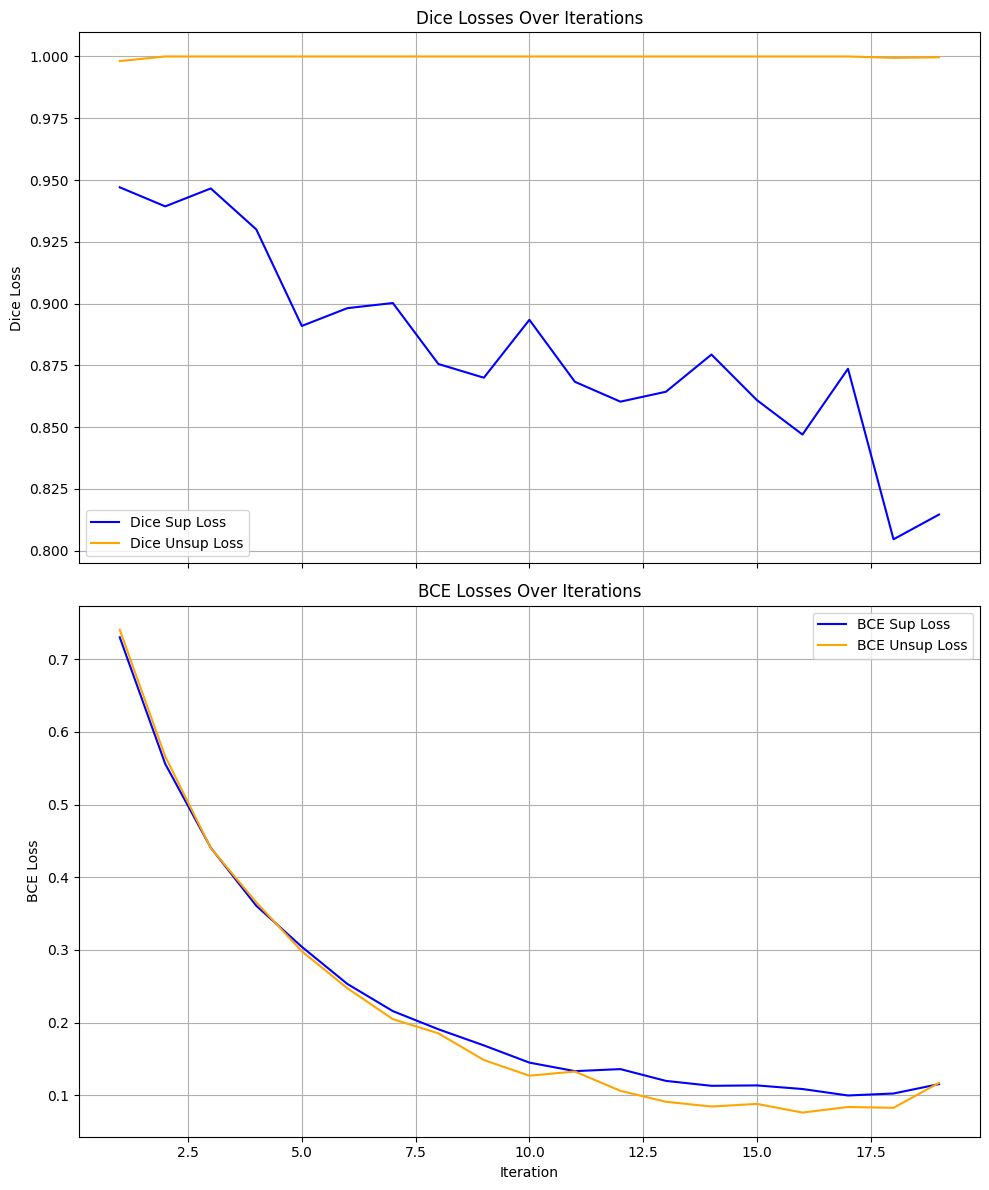

In [7]:
import re
import matplotlib.pyplot as plt

# Compile regular expression to parse the relevant lines
pattern = re.compile(
    r"Epoch (\d+), iter (\d+), Dice Sup Loss: ([\d.]+), Dice Unsup Loss: ([\d.]+), BCE Sup Loss: ([\d.]+), BCE UnSup Loss: ([\d.]+)"
)

# Initialize lists to store the extracted values
iters = []
dice_sup_losses = []
dice_unsup_losses = []
bce_sup_losses = []
bce_unsup_losses = []

# Parse the logs
for line in logs.strip().split("\n"):
    match = pattern.match(line)
    if match:
        epoch = int(match.group(1))
        iteration = int(match.group(2))
        dice_sup_loss = float(match.group(3))
        dice_unsup_loss = float(match.group(4))
        bce_sup_loss = float(match.group(5))
        bce_unsup_loss = float(match.group(6))

        # Append values to the lists
        iters.append(iteration)
        dice_sup_losses.append(dice_sup_loss)
        dice_unsup_losses.append(dice_unsup_loss)
        bce_sup_losses.append(bce_sup_loss)
        bce_unsup_losses.append(bce_unsup_loss)


# Function to plot the data in subplots
def plot_losses_subplots(iters, dice_losses, bce_losses):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

    # Plot Dice losses
    ax1.plot(iters, dice_losses["Dice Sup Loss"], label="Dice Sup Loss", color="blue")
    ax1.plot(
        iters, dice_losses["Dice Unsup Loss"], label="Dice Unsup Loss", color="orange"
    )
    ax1.set_ylabel("Dice Loss")
    ax1.set_title("Dice Losses Over Iterations")
    ax1.legend()
    ax1.grid(True)

    # Plot BCE losses
    ax2.plot(iters, bce_losses["BCE Sup Loss"], label="BCE Sup Loss", color="blue")
    ax2.plot(
        iters, bce_losses["BCE Unsup Loss"], label="BCE Unsup Loss", color="orange"
    )
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("BCE Loss")
    ax2.set_title("BCE Losses Over Iterations")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


# Prepare loss values for plotting
dice_losses = {
    "Dice Sup Loss": dice_sup_losses,
    "Dice Unsup Loss": dice_unsup_losses,
}

bce_losses = {
    "BCE Sup Loss": bce_sup_losses,
    "BCE Unsup Loss": bce_unsup_losses,
}

# Plot the data
plot_losses_subplots(iters, dice_losses, bce_losses)